<a href="https://colab.research.google.com/github/TheNewLearn/youtube_dataset/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [233]:
df = pd.read_csv("https://raw.githubusercontent.com/TheNewLearn/youtube_dataset/main/USvideos.csv",error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [234]:
comment = pd.read_csv("https://raw.githubusercontent.com/TheNewLearn/youtube_dataset/main/UScomments.csv",error_bad_lines=False)
comment.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [235]:
cat_dict = {1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

def findval(key):
  return cat_dict.get(key)


def replace_cat(name):
  if df[name].dtypes!= "object":
    df['category_id'] = df['category_id'].map(str)
    for i in range(0,len(df['category_id'])):
      df[name].values[i] = findval(int(df[name].values[i]))
     
replace_cat("category_id")

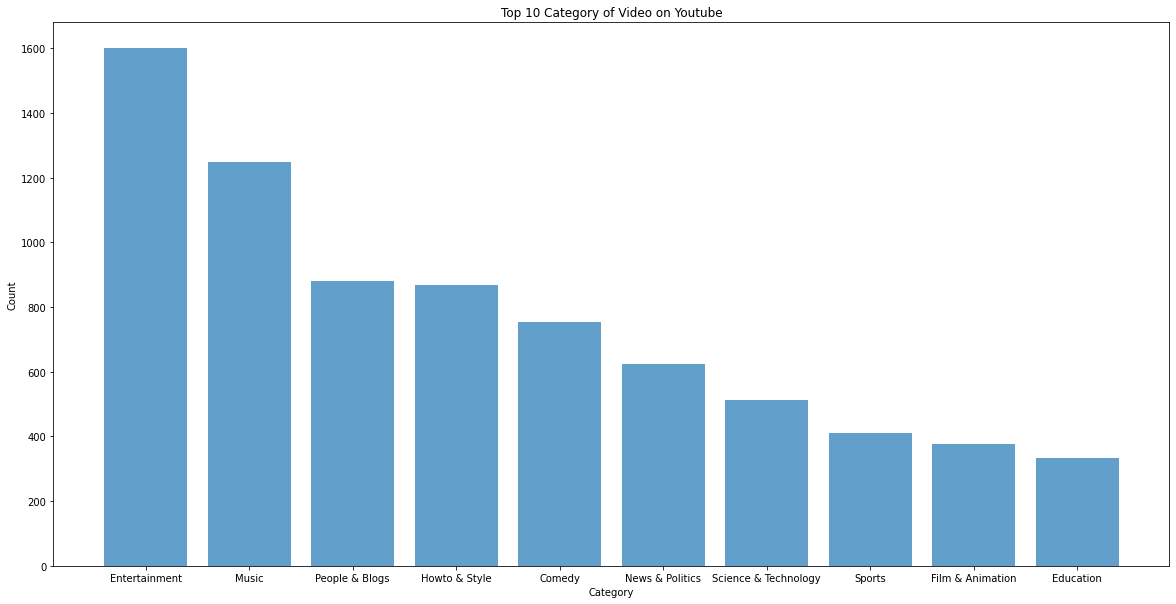

In [236]:
cat = df['category_id'].value_counts()
top10_cat = cat.nlargest(n=10).to_dict()
bar_x = [x for x in top10_cat.keys()]
bar_y = [top10_cat[x] for x in top10_cat.keys()]
plt.figure(figsize=(20,10))
plt.bar(bar_x,bar_y,label="Frequency",alpha=0.7)
plt.title("Top 10 Category of Video on Youtube")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

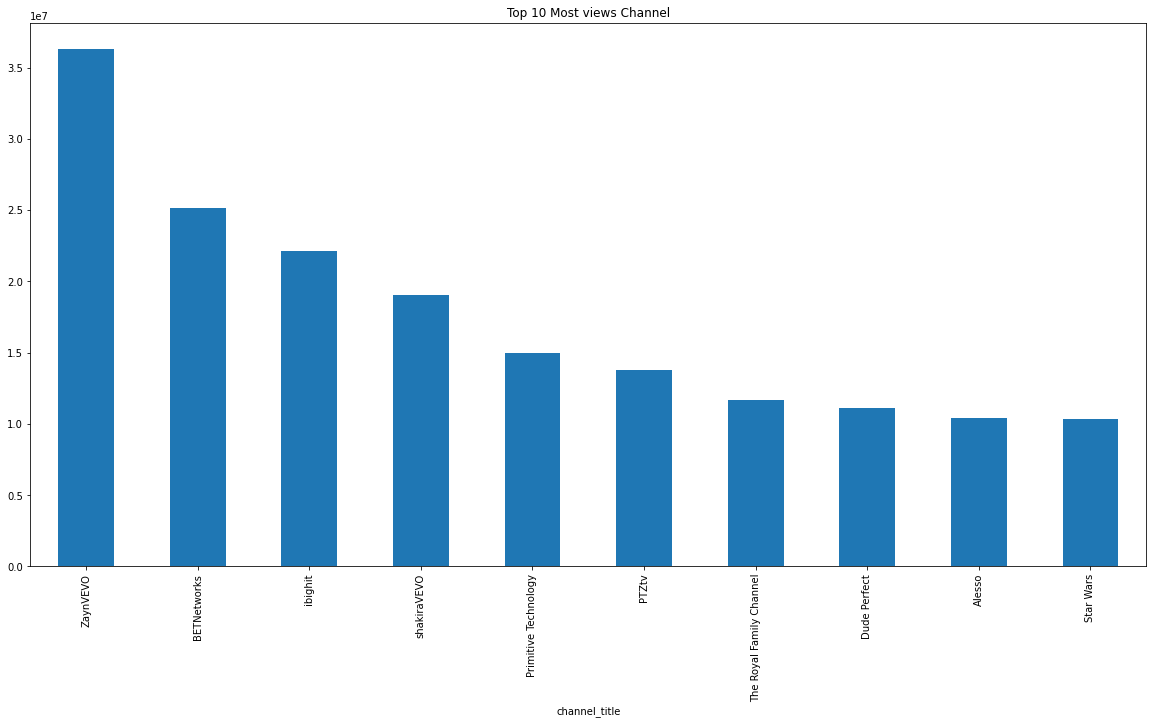

In [237]:
views_channel = pd.DataFrame(df.groupby(by=['channel_title'])['views'].mean()).sort_values(by='views',ascending= False)
top10_views_channel = views_channel.head(10)['views']
plt.figure(figsize=(20,10))
top10_views_channel.plot(kind = "bar")
plt.title("Top 10 Most views Channel")
plt.show()


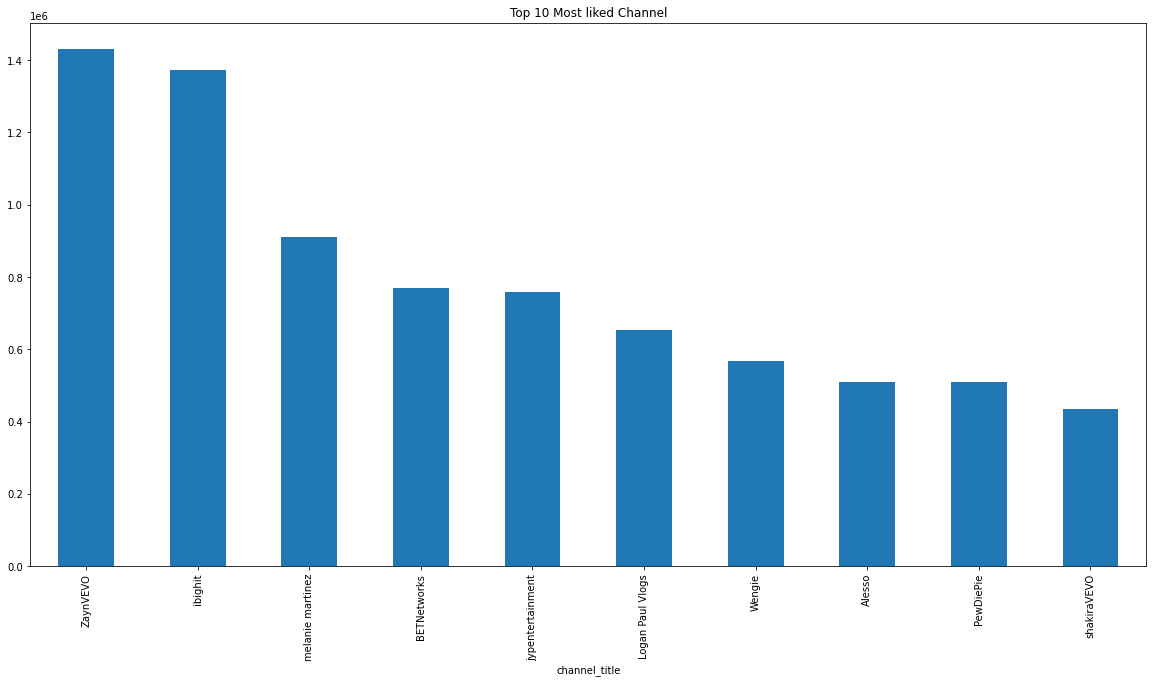

In [238]:
liked_channel = pd.DataFrame(df.groupby(by=['channel_title'])['likes'].mean()).sort_values(by='likes',ascending= False)
top10_liked_channel = liked_channel.head(10)['likes']
plt.figure(figsize=(20,10))
top10_liked_channel.plot(kind = "bar")
plt.title("Top 10 Most liked Channel")
plt.show()

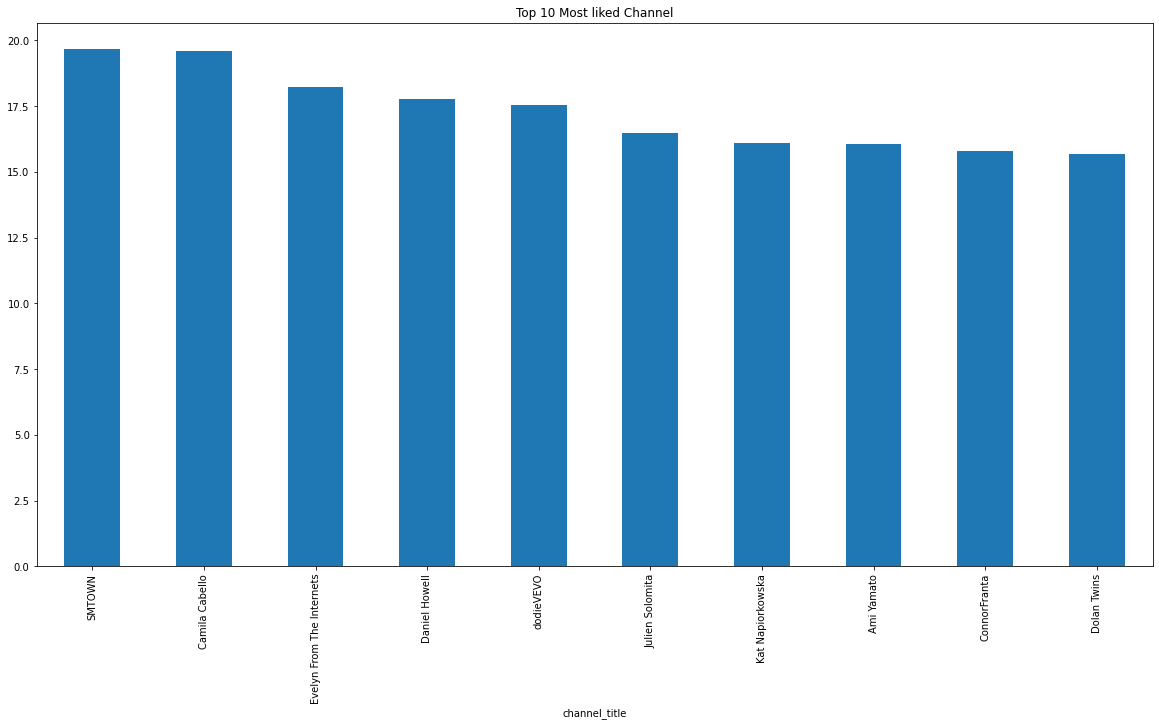

In [239]:
df['like_rate'] = round((df['likes'] / df['views'])*100,2)
like_rate_channel = pd.DataFrame(df.groupby(by=['channel_title'])['like_rate'].mean()).sort_values(by='like_rate',ascending= False)
top10_liked_rate_channel = like_rate_channel.head(10)['like_rate']
plt.figure(figsize=(20,10))
top10_liked_rate_channel.plot(kind = "bar")
plt.title("Top 10 Most liked Channel")
plt.show()


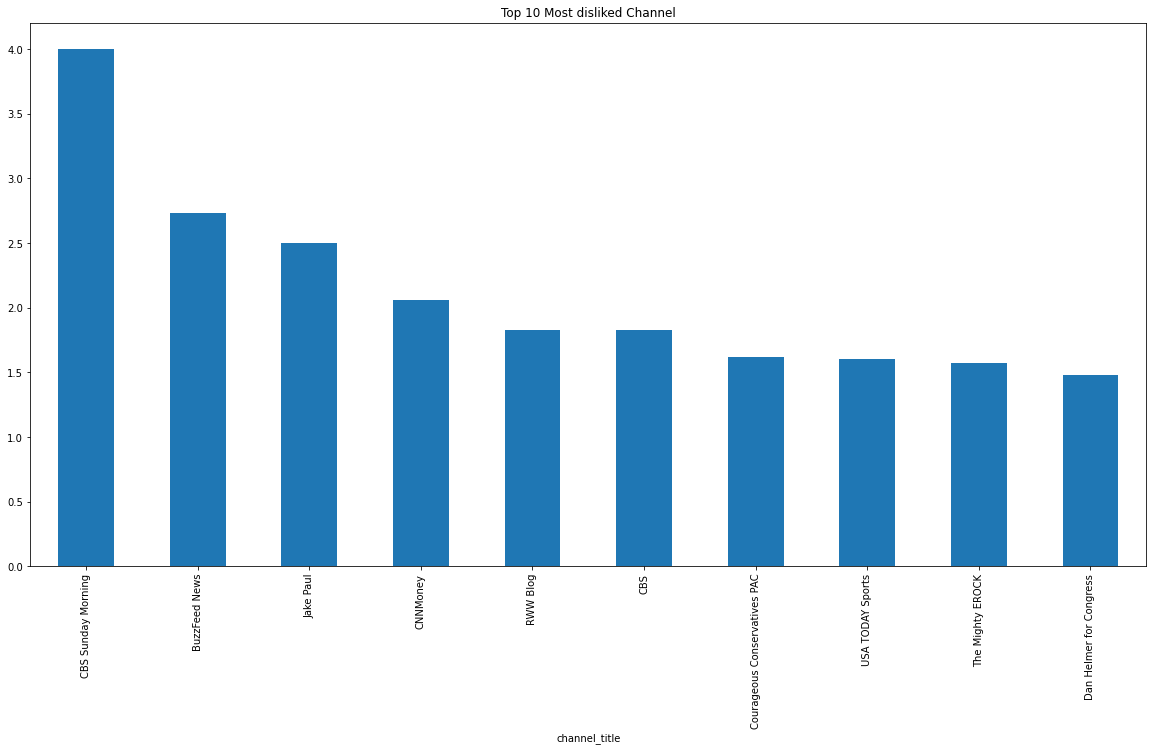

In [240]:
df['dislike_rate'] =  round((df['dislikes'] / df['views'])*100,2)
dislike_rate_channel = pd.DataFrame(df.groupby(by=['channel_title'])['dislike_rate'].mean()).sort_values(by='dislike_rate',ascending= False)
top10_disliked_rate_channel = dislike_rate_channel.head(10)['dislike_rate']
plt.figure(figsize=(20,10))
top10_disliked_rate_channel.plot(kind = "bar")
plt.title("Top 10 Most disliked Channel")
plt.show()


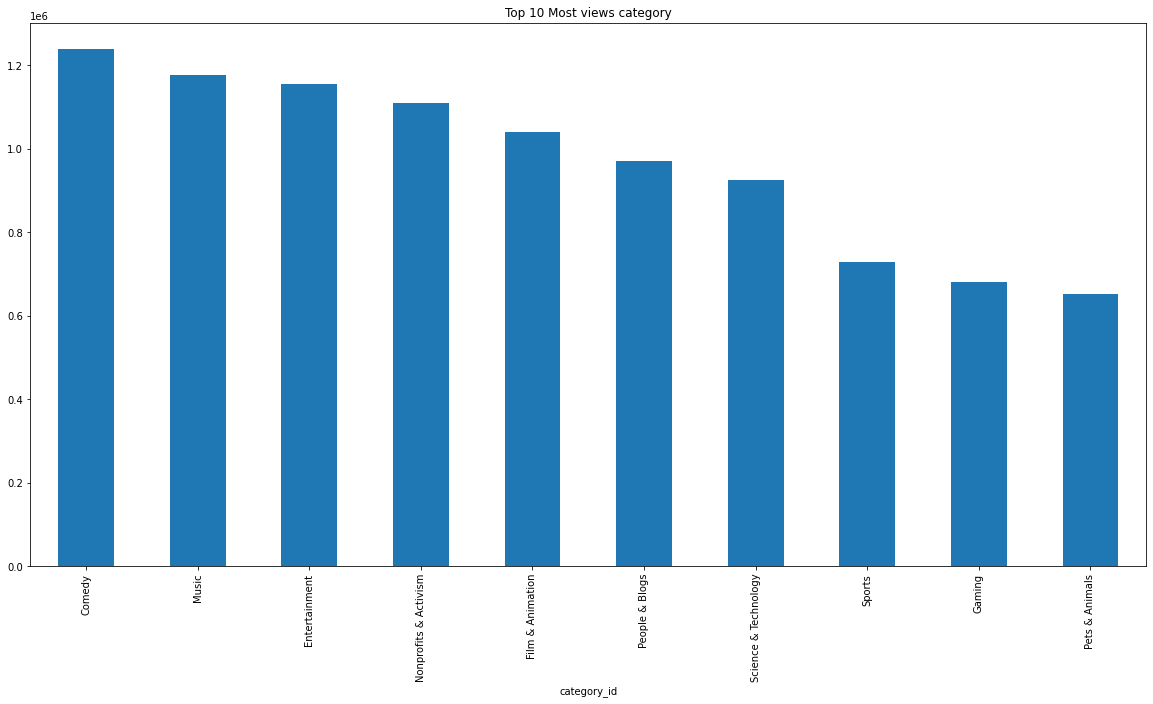

In [241]:
cat_views = pd.DataFrame(df.groupby(by=['category_id'])['views'].mean()).sort_values(by='views',ascending= False)
top10_cat_views = cat_views.head(10)['views']
plt.figure(figsize=(20,10))
top10_cat_views.plot(kind = "bar")
plt.title("Top 10 Most views category")
plt.show()

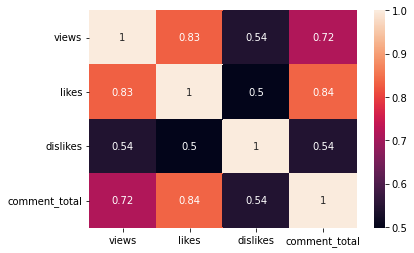

In [242]:
hetmap = df[['views','likes','dislikes','comment_total']]
sns.heatmap(hetmap.corr(),annot=True)

In [256]:
uniqcomment = comment['video_id'].unique()
print(uniqcomment)

['XpVt6Z1Gjjo' 'cLdxuaxaQwc' 'WYYvHb03Eog' ... 'S9VIKOuZcds' 'a5NIg5yyHWo'
 '3VSa-oARk-w']


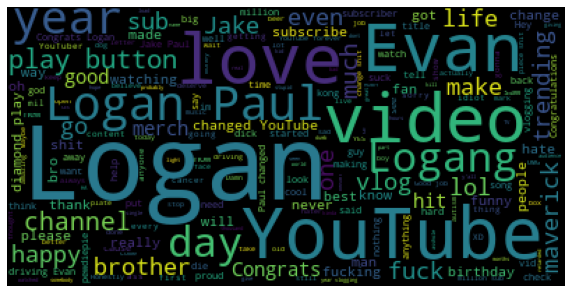

In [278]:
#all comment by viedo id
def video_wordcloud(video_id):
  co = comment.loc[comment['video_id'] == video_id]['comment_text']
  text = ' '.join(co)
  wordcloud = WordCloud(stopwords=(set(STOPWORDS))).generate(text)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')


video_wordcloud("XpVt6Z1Gjjo")



In [269]:
text = []
for i in comment['comment_text']:
  text.append(TextBlob(i).sentiment.polarity)

comment['polarity'] = text

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


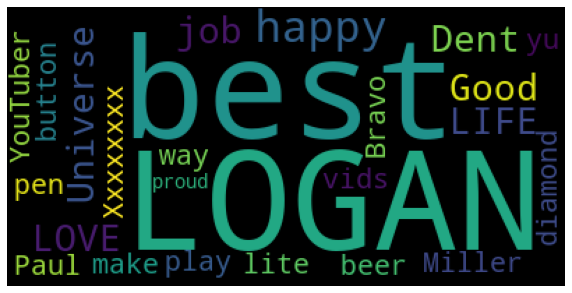

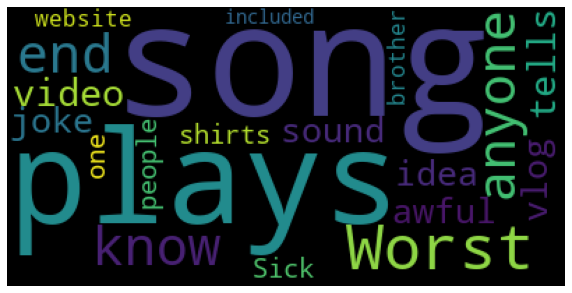

In [279]:
#positive or negative comment by video id
def video_wordcloud_positive(video_id):
  co = comment.loc[(comment['video_id'] == video_id) & (comment['polarity'] == 1)]['comment_text']
  text = ' '.join(co)
  wordcloud = WordCloud(stopwords=(set(STOPWORDS))).generate(text)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')


def video_wordcloud_negative(video_id):
  co = comment.loc[(comment['video_id'] == video_id) & (comment['polarity'] == -1)]['comment_text']
  text = ' '.join(co)
  wordcloud = WordCloud(stopwords=(set(STOPWORDS))).generate(text)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')


video_wordcloud_positive("XpVt6Z1Gjjo")
video_wordcloud_negative("XpVt6Z1Gjjo")

(-0.5, 399.5, 199.5, -0.5)

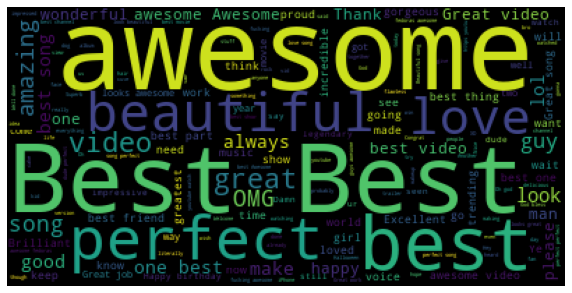

In [280]:
#all positive comment 
positive_comment = comment[comment['polarity'] == 1]
text = ""
text = ' '.join(positive_comment['comment_text'])
wordcloud = WordCloud(stopwords=(set(STOPWORDS))).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

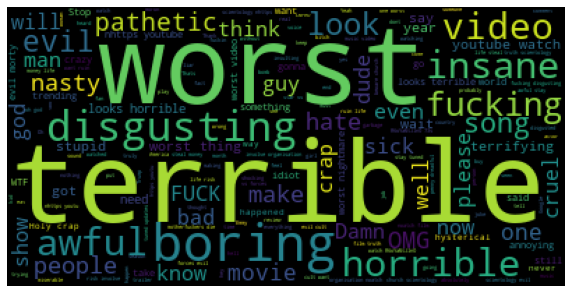

In [282]:
#all negative coomment
negative_coomment = comment[comment['polarity'] == -1]
text = ""
text = ' '.join(negative_coomment['comment_text'])
wordcloud = WordCloud(stopwords=(set(STOPWORDS))).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')